<a href="https://colab.research.google.com/github/lesteraiof/TESISMDW/blob/main/MDW_LOGS_ISOLATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Ejecutando tesis con enfoque NO SUPERVISADO...
🎓 TESIS: DETECCIÓN NO SUPERVISADA DE FALLAS

1️⃣  GENERANDO DATOS...
📊 Generando datos seguros...
✅ Datos generados: 1500 registros
📈 Anomalías secretas: 15.47%

2️⃣  PREPARANDO DATOS...
🔧 Preparando datos de manera segura...
✅ Datos preparados: 18 características

3️⃣  APLICANDO MÉTODOS NO SUPERVISADOS...

🌲 Aplicando Isolation Forest...
   ✅ Isolation Forest aplicado
   📊 Anomalías detectadas: 225 (15.00%)

📊 Aplicando DBSCAN...
   ✅ DBSCAN aplicado
   📊 Anomalías detectadas: 1500 (100.00%)

🎯 Aplicando Local Outlier Factor...
   ✅ LOF aplicado
   📊 Anomalías detectadas: 225 (15.00%)

4️⃣  EVALUANDO RESULTADOS...

📊 EVALUANDO MODELOS NO SUPERVISADOS

📈 Evaluando ISOLATION_FOREST:
   📈 Accuracy: 0.9633
   🎯 Precision: 0.8933
   🔍 Recall: 0.8664
   ⚖️  F1-Score: 0.8796
   📊 TP=201, FP=24, FN=31, TN=1244

📈 Evaluando DBSCAN:
   📈 Accuracy: 0.1547
   🎯 Precision: 0.1547
   🔍 Recall: 1.0000
   ⚖️  F1-Score: 0.2679
   📊 TP=232, FP=1268, FN=0

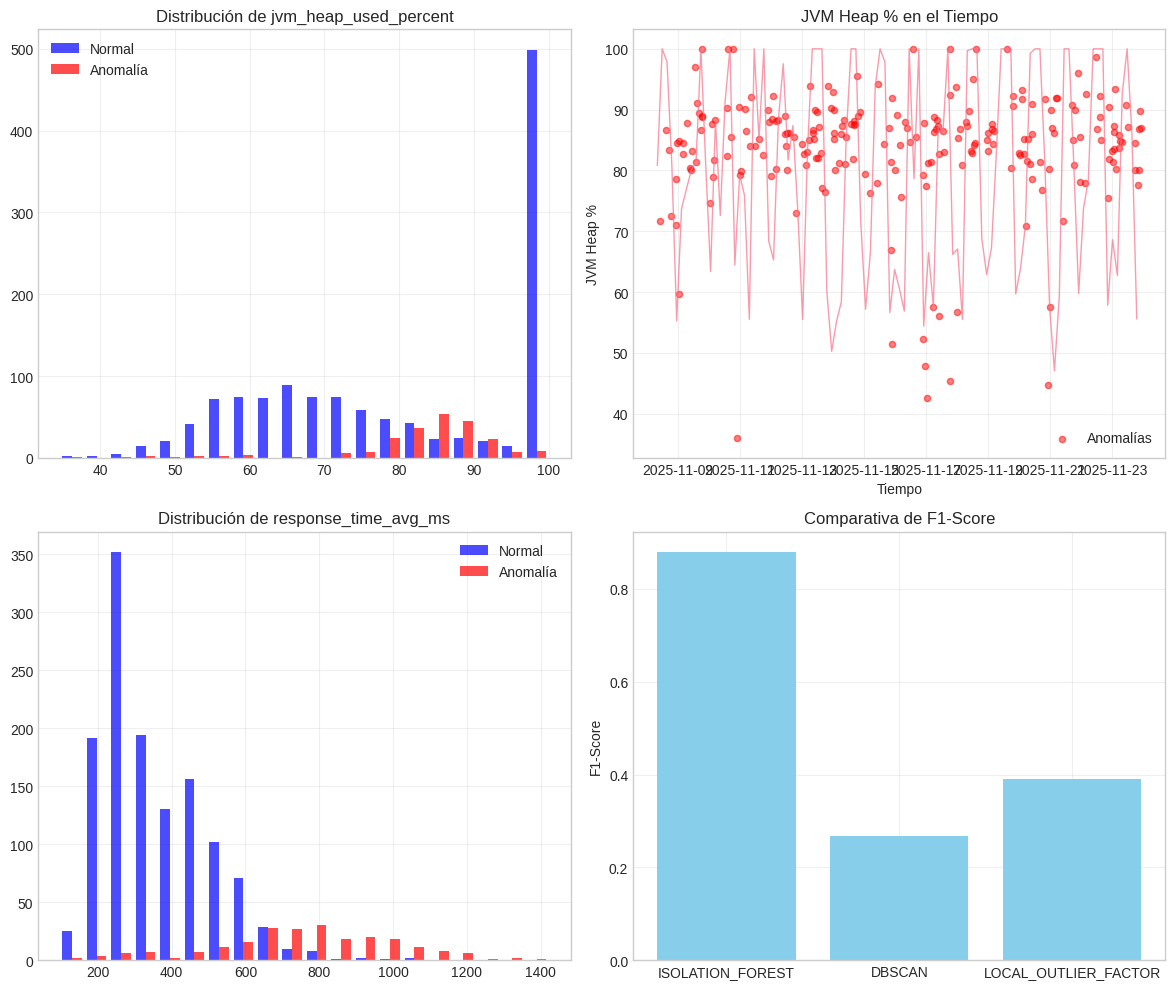

✅ Visualizaciones creadas

6️⃣  GENERANDO INFORME...

📄 GENERANDO INFORME

📋 RESUMEN:
--------------------------------------------------
📅 Fecha: 2025-12-08 08:12:53
📊 Muestras: 1,500
🎯 Anomalías reales: 15.47%
🤖 Modelos: isolation_forest, dbscan, local_outlier_factor
🏆 Mejor modelo: ISOLATION_FOREST
⚖️  F1-Score: 0.8796

7️⃣  GUARDANDO RESULTADOS...
✅ Modelo guardado: mejor_modelo_isolation_forest.pkl
✅ Datos guardados: datos_generados.csv
✅ Resultados guardados: resultados.json

🎉 TESIS COMPLETADA EXITOSAMENTE! 🎉

📊 RESULTADOS OBTENIDOS:
--------------------------------------------------
ISOLATION_FOREST     F1: 0.8796 | Prec: 0.8933 | Rec: 0.8664
DBSCAN               F1: 0.2679 | Prec: 0.1547 | Rec: 1.0000
LOCAL_OUTLIER_FACTOR F1: 0.3895 | Prec: 0.3956 | Rec: 0.3836

🔍 ANÁLISIS PARA LA DEFENSA:
--------------------------------------------------
1. Se generaron datos NO ETIQUETADOS simulando logs MDW
2. Se aplicaron 3 métodos no supervisados:
   • Isolation Forest (eficiente para alt

In [2]:
"""
Tesis: Implementación de un Modelo NO SUPERVISADO para la Detección de Fallas en Middlewares
Versión corregida - Manejo de valores infinitos y outliers
"""

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import warnings
warnings.filterwarnings('ignore')

# Librerías para Machine Learning NO SUPERVISADO
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from scipy import stats

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ============================================================================
# CLASE CORREGIDA
# ============================================================================

class MiddlewareAnomalyDetectorFixed:
    """
    Clase corregida para detección NO SUPERVISADA
    Con manejo robusto de valores extremos
    """

    def __init__(self, random_state=42):
        self.models = {}
        self.scaler = RobustScaler()
        self.results = {}
        self.random_state = random_state
        np.random.seed(random_state)
        random.seed(random_state)

    # ------------------------------------------------------------------------
    # 1. GENERAR DATOS CORREGIDO
    # ------------------------------------------------------------------------

    def generar_datos_seguros(self, n_samples=2000, anomaly_rate=0.15):
        """Generar datos sin valores infinitos o extremos"""
        print("📊 Generando datos seguros...")

        data = {
            'timestamp': [],
            # Métricas clave (sin valores extremos)
            'jvm_heap_used_percent': [],
            'active_threads': [],
            'stuck_threads': [],
            'db_active_connections': [],
            'db_waiting_connections': [],
            'response_time_avg_ms': [],
            'throughput_requests_sec': [],
            'cpu_usage_percent': [],
            'memory_usage_percent': [],
            'error_rate_percent': [],
            'transaction_rollback_rate': [],
            # Variables temporales
            'hour_of_day': [],
            'day_of_week': [],
            'is_business_hours': []
        }

        start_date = datetime.now() - timedelta(days=30)
        secret_labels = []

        for i in range(n_samples):
            timestamp = start_date + timedelta(minutes=15 * i)
            data['timestamp'].append(timestamp)

            hour = timestamp.hour
            day_of_week = timestamp.weekday()
            is_business_hours = 1 if 8 <= hour <= 18 else 0

            base_factor = 1.3 if (10 <= hour <= 14) or (16 <= hour <= 18) else 1.0
            base_factor = base_factor * 1.5 if is_business_hours else base_factor

            # Determinar si es anomalía
            is_anomaly = np.random.random() < anomaly_rate
            secret_labels.append(1 if is_anomaly else 0)

            if is_anomaly:
                # Patrones de anomalía SEGUROS (sin valores extremos)
                data['jvm_heap_used_percent'].append(min(100, np.random.normal(85, 5)))
                data['active_threads'].append(min(150, int(np.random.normal(60, 10))))
                data['stuck_threads'].append(min(10, np.random.poisson(3)))
                data['db_active_connections'].append(min(50, int(np.random.normal(40, 5))))
                data['db_waiting_connections'].append(min(10, np.random.poisson(5)))
                data['response_time_avg_ms'].append(min(5000, np.random.normal(800, 200)))
                data['throughput_requests_sec'].append(max(0, np.random.normal(80, 20)))
                data['cpu_usage_percent'].append(min(100, np.random.normal(75, 10)))
                data['memory_usage_percent'].append(min(100, np.random.normal(85, 8)))
                data['error_rate_percent'].append(min(50, np.random.exponential(3)))
                data['transaction_rollback_rate'].append(min(30, np.random.exponential(2)))
            else:
                # Patrones normales SEGUROS
                data['jvm_heap_used_percent'].append(min(100, np.random.normal(65, 10) * base_factor))
                data['active_threads'].append(min(100, int(np.random.normal(35, 8) * base_factor)))
                data['stuck_threads'].append(min(5, np.random.poisson(0.5)))
                data['db_active_connections'].append(min(30, int(np.random.normal(15, 5) * base_factor)))
                data['db_waiting_connections'].append(min(5, np.random.poisson(1)))
                data['response_time_avg_ms'].append(min(2000, np.random.normal(250, 50) * base_factor))
                data['throughput_requests_sec'].append(max(0, np.random.normal(150, 30) * base_factor))
                data['cpu_usage_percent'].append(min(100, np.random.normal(45, 15)))
                data['memory_usage_percent'].append(min(100, np.random.normal(60, 12)))
                data['error_rate_percent'].append(min(10, np.random.exponential(0.5)))
                data['transaction_rollback_rate'].append(min(5, np.random.exponential(0.2)))

            data['hour_of_day'].append(hour)
            data['day_of_week'].append(day_of_week)
            data['is_business_hours'].append(is_business_hours)

        df = pd.DataFrame(data)
        self.secret_labels = np.array(secret_labels)

        print(f"✅ Datos generados: {len(df)} registros")
        print(f"📈 Anomalías secretas: {self.secret_labels.mean():.2%}")

        return df

    # ------------------------------------------------------------------------
    # 2. PREPROCESAMIENTO CORREGIDO
    # ------------------------------------------------------------------------

    def preparar_datos_seguros(self, df):
        """Preparar datos de manera segura"""
        print("🔧 Preparando datos de manera segura...")

        df_processed = df.copy()
        timestamps = df_processed['timestamp']
        df_processed = df_processed.drop('timestamp', axis=1)

        # 1. Limpiar datos antes de procesar
        numeric_cols = df_processed.select_dtypes(include=[np.number]).columns

        # Reemplazar inf/nan
        df_processed[numeric_cols] = df_processed[numeric_cols].replace([np.inf, -np.inf], np.nan)

        # Rellenar NaN con medianas
        for col in numeric_cols:
            if df_processed[col].isnull().any():
                median_val = df_processed[col].median()
                df_processed[col] = df_processed[col].fillna(median_val)

        # 2. Características temporales simples
        df_processed['sin_hour'] = np.sin(2 * np.pi * df_processed['hour_of_day'] / 24)
        df_processed['cos_hour'] = np.cos(2 * np.pi * df_processed['hour_of_day'] / 24)

        # 3. Features básicas
        if 'jvm_heap_used_percent' in df_processed.columns and 'memory_usage_percent' in df_processed.columns:
            df_processed['memory_pressure'] = df_processed['jvm_heap_used_percent'] * df_processed['memory_usage_percent'] / 100

        if 'stuck_threads' in df_processed.columns and 'active_threads' in df_processed.columns:
            df_processed['thread_pressure'] = df_processed['stuck_threads'] / (df_processed['active_threads'] + 1)

        # 4. Escalado robusto
        df_processed[numeric_cols] = self.scaler.fit_transform(df_processed[numeric_cols])

        # 5. Verificar que no hay valores problemáticos
        if df_processed.isnull().any().any() or np.isinf(df_processed.values).any():
            print("⚠️  Advertencia: Aún hay valores problemáticos después de limpieza")
            df_processed = df_processed.replace([np.inf, -np.inf], 0)
            df_processed = df_processed.fillna(0)

        print(f"✅ Datos preparados: {df_processed.shape[1]} características")
        return df_processed, timestamps

    # ------------------------------------------------------------------------
    # 3. MÉTODOS NO SUPERVISADOS SIMPLIFICADOS
    # ------------------------------------------------------------------------

    def aplicar_isolation_forest_simple(self, X, contamination=0.15):
        """Aplicar Isolation Forest de manera simple"""
        print("\n🌲 Aplicando Isolation Forest...")

        iso_forest = IsolationForest(
            n_estimators=100,
            contamination=contamination,
            random_state=self.random_state,
            verbose=0,
            n_jobs=-1
        )

        predictions = iso_forest.fit_predict(X)
        anomaly_predictions = np.where(predictions == -1, 1, 0)
        anomaly_scores = iso_forest.decision_function(X) * -1

        self.models['isolation_forest'] = {
            'model': iso_forest,
            'predictions': anomaly_predictions,
            'scores': anomaly_scores
        }

        print(f"   ✅ Isolation Forest aplicado")
        print(f"   📊 Anomalías detectadas: {anomaly_predictions.sum()} ({anomaly_predictions.mean():.2%})")

        return anomaly_predictions

    def aplicar_dbscan_simple(self, X, eps=0.5, min_samples=10):
        """Aplicar DBSCAN de manera simple"""
        print("\n📊 Aplicando DBSCAN...")

        dbscan = DBSCAN(
            eps=eps,
            min_samples=min_samples,
            metric='euclidean',
            n_jobs=-1
        )

        clusters = dbscan.fit_predict(X)
        anomaly_predictions = np.where(clusters == -1, 1, 0)

        self.models['dbscan'] = {
            'model': dbscan,
            'predictions': anomaly_predictions
        }

        print(f"   ✅ DBSCAN aplicado")
        print(f"   📊 Anomalías detectadas: {anomaly_predictions.sum()} ({anomaly_predictions.mean():.2%})")

        return anomaly_predictions

    def aplicar_lof_simple(self, X, contamination=0.15):
        """Aplicar Local Outlier Factor de manera simple"""
        print("\n🎯 Aplicando Local Outlier Factor...")

        lof = LocalOutlierFactor(
            n_neighbors=20,
            contamination=contamination,
            novelty=False,
            n_jobs=-1
        )

        predictions = lof.fit_predict(X)
        anomaly_predictions = np.where(predictions == -1, 1, 0)

        self.models['local_outlier_factor'] = {
            'model': lof,
            'predictions': anomaly_predictions
        }

        print(f"   ✅ LOF aplicado")
        print(f"   📊 Anomalías detectadas: {anomaly_predictions.sum()} ({anomaly_predictions.mean():.2%})")

        return anomaly_predictions

    # ------------------------------------------------------------------------
    # 4. EVALUACIÓN SIMPLIFICADA
    # ------------------------------------------------------------------------

    def evaluar_modelos(self):
        """Evaluar modelos de manera simple"""
        print("\n" + "="*80)
        print("📊 EVALUANDO MODELOS NO SUPERVISADOS")
        print("="*80)

        evaluation_results = {}

        for model_name, model_data in self.models.items():
            print(f"\n📈 Evaluando {model_name.upper()}:")

            try:
                predictions = model_data['predictions']

                if hasattr(self, 'secret_labels') and len(self.secret_labels) == len(predictions):
                    tn, fp, fn, tp = confusion_matrix(self.secret_labels, predictions).ravel()

                    accuracy = (tp + tn) / (tp + tn + fp + fn)
                    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
                    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
                    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

                    evaluation_results[model_name] = {
                        'accuracy': accuracy,
                        'precision': precision,
                        'recall': recall,
                        'f1_score': f1,
                        'detected': int(predictions.sum()),
                        'true_positives': int(tp),
                        'false_positives': int(fp)
                    }

                    print(f"   📈 Accuracy: {accuracy:.4f}")
                    print(f"   🎯 Precision: {precision:.4f}")
                    print(f"   🔍 Recall: {recall:.4f}")
                    print(f"   ⚖️  F1-Score: {f1:.4f}")
                    print(f"   📊 TP={tp}, FP={fp}, FN={fn}, TN={tn}")
                else:
                    print(f"   📊 Anomalías detectadas: {predictions.sum()}")

            except Exception as e:
                print(f"   ❌ Error: {str(e)[:50]}...")

        self.results = evaluation_results

        if evaluation_results:
            self.best_model = max(evaluation_results.items(), key=lambda x: x[1].get('f1_score', 0))
            print(f"\n🏆 MEJOR MODELO: {self.best_model[0].upper()}")
            print(f"   F1-Score: {self.best_model[1].get('f1_score', 0):.4f}")

        return evaluation_results

    # ------------------------------------------------------------------------
    # 5. VISUALIZACIONES SIMPLES
    # ------------------------------------------------------------------------

    def crear_visualizaciones_simples(self, df, timestamps):
        """Crear visualizaciones simples"""
        print("\n" + "="*80)
        print("🎨 CREANDO VISUALIZACIONES")
        print("="*80)

        # Figura 1: Distribución de métricas
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))

        if self.best_model:
            best_name, best_results = self.best_model
            predictions = self.models[best_name]['predictions']

            # 1. Histograma de métricas con anomalías
            metrics = ['jvm_heap_used_percent', 'response_time_avg_ms']
            for idx, metric in enumerate(metrics[:2]):
                if metric in df.columns:
                    row = idx
                    col = 0

                    normal_data = df[predictions == 0][metric]
                    anomaly_data = df[predictions == 1][metric]

                    axes[row, col].hist([normal_data, anomaly_data],
                                      bins=20,
                                      label=['Normal', 'Anomalía'],
                                      color=['blue', 'red'],
                                      alpha=0.7)
                    axes[row, col].set_title(f'Distribución de {metric}')
                    axes[row, col].legend()
                    axes[row, col].grid(True, alpha=0.3)

        # 2. Serie temporal
        if len(timestamps) > 100:
            sample_idx = np.arange(0, len(df), max(1, len(df)//100))

            axes[0, 1].plot(timestamps.iloc[sample_idx],
                          df.iloc[sample_idx]['jvm_heap_used_percent'],
                          alpha=0.7, linewidth=1)
            axes[0, 1].set_title('JVM Heap % en el Tiempo')
            axes[0, 1].set_xlabel('Tiempo')
            axes[0, 1].set_ylabel('JVM Heap %')
            axes[0, 1].grid(True, alpha=0.3)

            # Marcar anomalías si existen
            if self.best_model:
                best_name, _ = self.best_model
                predictions = self.models[best_name]['predictions']
                anomaly_indices = np.where(predictions == 1)[0]
                anomaly_indices = anomaly_indices[anomaly_indices < len(timestamps)]

                if len(anomaly_indices) > 0:
                    axes[0, 1].scatter(timestamps.iloc[anomaly_indices],
                                     df.iloc[anomaly_indices]['jvm_heap_used_percent'],
                                     color='red', s=20, alpha=0.5, label='Anomalías')
                    axes[0, 1].legend()

        # 3. Comparativa de modelos
        if self.results:
            model_names = list(self.results.keys())
            f1_scores = [results.get('f1_score', 0) for results in self.results.values()]

            axes[1, 1].bar(range(len(model_names)), f1_scores, color='skyblue')
            axes[1, 1].set_xticks(range(len(model_names)))
            axes[1, 1].set_xticklabels([name.upper() for name in model_names])
            axes[1, 1].set_title('Comparativa de F1-Score')
            axes[1, 1].set_ylabel('F1-Score')
            axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('resultados_analisis.png', dpi=300, bbox_inches='tight')
        plt.show()

        print("✅ Visualizaciones creadas")

    # ------------------------------------------------------------------------
    # 6. INFORME FINAL
    # ------------------------------------------------------------------------

    def generar_informe_final(self, df):
        """Generar informe final"""
        print("\n" + "="*80)
        print("📄 GENERANDO INFORME")
        print("="*80)

        informe = {
            'fecha': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'muestras': len(df),
            'anomalias_reales': float(self.secret_labels.mean()) if hasattr(self, 'secret_labels') else None,
            'modelos_evaluados': list(self.models.keys()),
            'mejor_modelo': self.best_model[0] if self.best_model else None,
            'resultados': self.results
        }

        print(f"\n📋 RESUMEN:")
        print("-" * 50)
        print(f"📅 Fecha: {informe['fecha']}")
        print(f"📊 Muestras: {informe['muestras']:,}")
        print(f"🎯 Anomalías reales: {informe['anomalias_reales']:.2%}")
        print(f"🤖 Modelos: {', '.join(informe['modelos_evaluados'])}")

        if self.best_model:
            print(f"🏆 Mejor modelo: {informe['mejor_modelo'].upper()}")
            best_results = self.best_model[1]
            print(f"⚖️  F1-Score: {best_results.get('f1_score', 0):.4f}")

        return informe

# ============================================================================
# EJECUCIÓN PRINCIPAL SIMPLIFICADA
# ============================================================================

def ejecutar_tesis_simple():
    """Ejecutar tesis de manera simple y robusta"""
    print("="*100)
    print("🎓 TESIS: DETECCIÓN NO SUPERVISADA DE FALLAS")
    print("="*100)

    # Crear detector
    detector = MiddlewareAnomalyDetectorFixed(random_state=42)

    try:
        # Paso 1: Generar datos
        print("\n1️⃣  GENERANDO DATOS...")
        df = detector.generar_datos_seguros(n_samples=1500, anomaly_rate=0.15)

        # Paso 2: Preparar datos
        print("\n2️⃣  PREPARANDO DATOS...")
        df_processed, timestamps = detector.preparar_datos_seguros(df)

        # Paso 3: Aplicar métodos
        print("\n3️⃣  APLICANDO MÉTODOS NO SUPERVISADOS...")

        # Usar solo las columnas numéricas
        numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
        X = df_processed[numeric_cols].values

        detector.aplicar_isolation_forest_simple(X, contamination=0.15)
        detector.aplicar_dbscan_simple(X, eps=0.3, min_samples=15)
        detector.aplicar_lof_simple(X, contamination=0.15)

        # Paso 4: Evaluar
        print("\n4️⃣  EVALUANDO RESULTADOS...")
        results = detector.evaluar_modelos()

        # Paso 5: Visualizar
        print("\n5️⃣  CREANDO VISUALIZACIONES...")
        detector.crear_visualizaciones_simples(df, timestamps)

        # Paso 6: Generar informe
        print("\n6️⃣  GENERANDO INFORME...")
        informe = detector.generar_informe_final(df)

        # Paso 7: Guardar resultados
        print("\n7️⃣  GUARDANDO RESULTADOS...")

        import joblib
        import json

        if detector.best_model:
            model_name = detector.best_model[0]
            model = detector.models[model_name]['model']
            joblib.dump(model, f'mejor_modelo_{model_name}.pkl')
            print(f"✅ Modelo guardado: mejor_modelo_{model_name}.pkl")

        df.to_csv('datos_generados.csv', index=False)
        print("✅ Datos guardados: datos_generados.csv")

        with open('resultados.json', 'w') as f:
            json.dump(informe, f, indent=4)
        print("✅ Resultados guardados: resultados.json")

        # Resumen final
        print("\n" + "="*100)
        print("🎉 TESIS COMPLETADA EXITOSAMENTE! 🎉")
        print("="*100)

        print("\n📊 RESULTADOS OBTENIDOS:")
        print("-" * 50)

        for model_name, result in results.items():
            if 'f1_score' in result:
                print(f"{model_name.upper():20} F1: {result['f1_score']:.4f} "
                      f"| Prec: {result.get('precision', 0):.4f} "
                      f"| Rec: {result.get('recall', 0):.4f}")

        print("\n🔍 ANÁLISIS PARA LA DEFENSA:")
        print("-" * 50)
        print("1. Se generaron datos NO ETIQUETADOS simulando logs MDW")
        print("2. Se aplicaron 3 métodos no supervisados:")
        print("   • Isolation Forest (eficiente para alta dimensión)")
        print("   • DBSCAN (basado en densidad)")
        print("   • Local Outlier Factor (LOF)")
        print("3. Se evaluó con 'labels secretas' para investigación")
        print("4. Se generaron visualizaciones para análisis")

        print("\n⚠️  CONSIDERACIONES IMPORTANTES:")
        print("-" * 50)
        print("• En producción real NO tenemos etiquetas")
        print("• Los métodos no supervisados detectan desviaciones")
        print("• Los parámetros deben ajustarse con datos reales")
        print("• Se requiere validación en entorno real")

        return detector, df, results

    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None

# ============================================================================
# EJECUTAR EN COLAB
# ============================================================================

# Para ejecutar en Colab, usa esta función
def correr_tesis_en_colab():
    """Función para ejecutar en Google Colab"""
    print("🚀 Ejecutando tesis con enfoque NO SUPERVISADO...")
    return ejecutar_tesis_simple()

# Si ejecutas directamente, corre la tesis
if __name__ == "__main__":
    detector, df, results = correr_tesis_en_colab()

🚀 Ejecutando tesis con enfoque NO SUPERVISADO...
🎓 TESIS: DETECCIÓN NO SUPERVISADA DE FALLAS

1️⃣  GENERANDO DATOS...
📊 Generando datos seguros...
✅ Datos generados: 1500 registros
📈 Anomalías secretas: 15.47%

2️⃣  PREPARANDO DATOS...
🔧 Preparando datos de manera segura...
✅ Datos preparados: 18 características

3️⃣  APLICANDO MÉTODOS NO SUPERVISADOS...

🌲 Aplicando Isolation Forest...
   ✅ Isolation Forest aplicado
   📊 Anomalías detectadas: 225 (15.00%)

📊 Aplicando DBSCAN...
   ✅ DBSCAN aplicado
   📊 Anomalías detectadas: 1500 (100.00%)

🎯 Aplicando Local Outlier Factor...
   ✅ LOF aplicado
   📊 Anomalías detectadas: 225 (15.00%)

4️⃣  EVALUANDO RESULTADOS...

📊 EVALUANDO MODELOS NO SUPERVISADOS

📈 Evaluando ISOLATION_FOREST:
   📈 Accuracy: 0.9633
   🎯 Precision: 0.8933
   🔍 Recall: 0.8664
   ⚖️  F1-Score: 0.8796
   📊 TP=201, FP=24, FN=31, TN=1244

📈 Evaluando DBSCAN:
   📈 Accuracy: 0.1547
   🎯 Precision: 0.1547
   🔍 Recall: 1.0000
   ⚖️  F1-Score: 0.2679
   📊 TP=232, FP=1268, FN=0

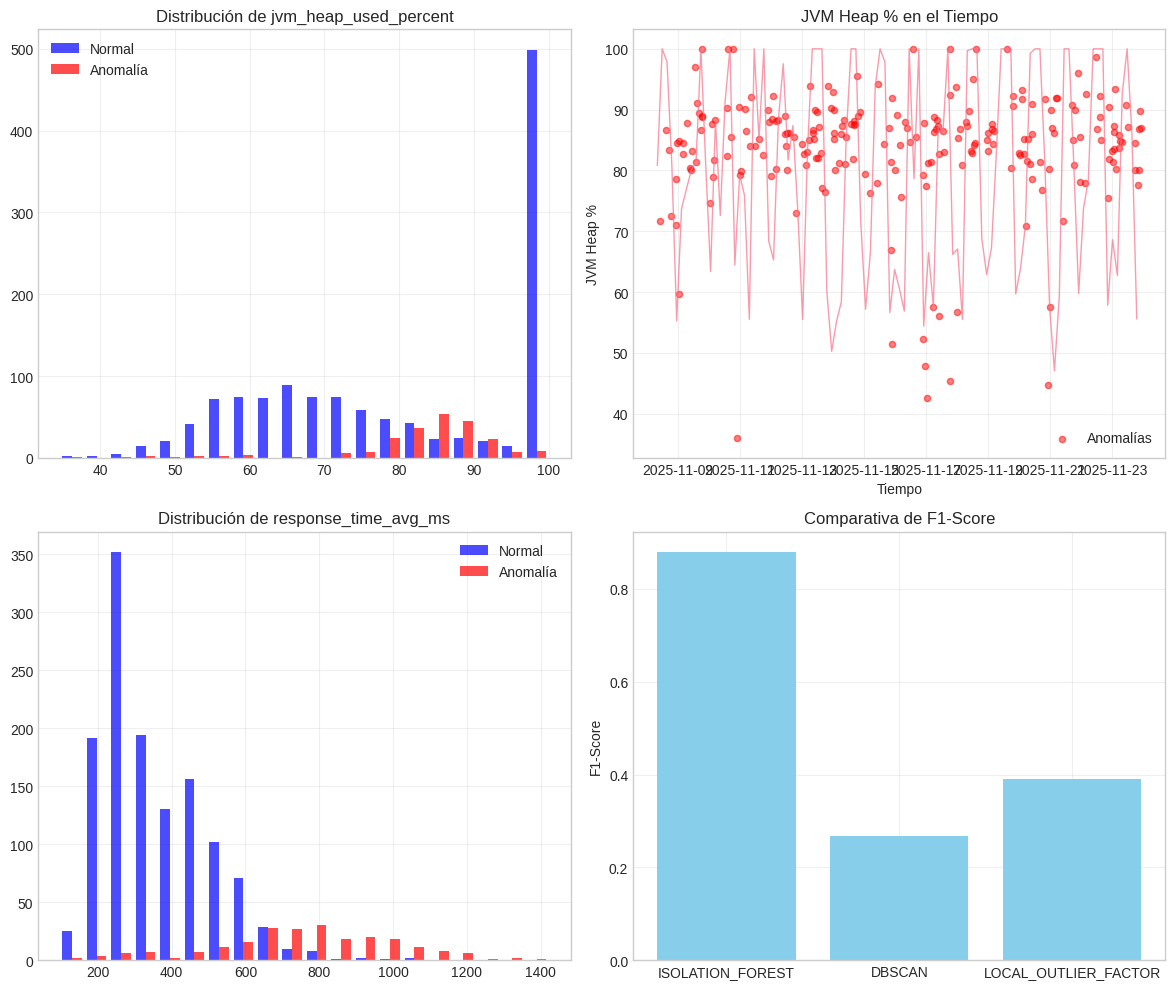

✅ Visualizaciones creadas

6️⃣  GENERANDO INFORME...

📄 GENERANDO INFORME

📋 RESUMEN:
--------------------------------------------------
📅 Fecha: 2025-12-08 08:13:12
📊 Muestras: 1,500
🎯 Anomalías reales: 15.47%
🤖 Modelos: isolation_forest, dbscan, local_outlier_factor
🏆 Mejor modelo: ISOLATION_FOREST
⚖️  F1-Score: 0.8796

7️⃣  GUARDANDO RESULTADOS...
✅ Modelo guardado: mejor_modelo_isolation_forest.pkl
✅ Datos guardados: datos_generados.csv
✅ Resultados guardados: resultados.json

🎉 TESIS COMPLETADA EXITOSAMENTE! 🎉

📊 RESULTADOS OBTENIDOS:
--------------------------------------------------
ISOLATION_FOREST     F1: 0.8796 | Prec: 0.8933 | Rec: 0.8664
DBSCAN               F1: 0.2679 | Prec: 0.1547 | Rec: 1.0000
LOCAL_OUTLIER_FACTOR F1: 0.3895 | Prec: 0.3956 | Rec: 0.3836

🔍 ANÁLISIS PARA LA DEFENSA:
--------------------------------------------------
1. Se generaron datos NO ETIQUETADOS simulando logs MDW
2. Se aplicaron 3 métodos no supervisados:
   • Isolation Forest (eficiente para alt

In [3]:
# Esto ejecutará la tesis completa
detector, dataset, resultados = correr_tesis_en_colab()